In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
phm_df = pd.read_parquet('../feature_extracts/', engine='fastparquet')


In [3]:
phm_df

,index,fault_class,individual,pdmp,pin,po,pdmp_avg_first_150,pdmp_avg_last_150,pdmp_avg_mid_300,pdmp_avg_diff,...,po_size,po_total_avg,po_variance,po_skew,po_kurtosis,po_twtt,pdmp_pin_kwut,pdmp_po_kwut,pin_po_kwut,pdmp_pin_po_kwht
0,22776,3,5,"[-0.194942, -0.187465, -0.180348, -0.173447, -...","[-1.731534, -1.755668, -1.738321, -1.691324, -...","[0.230999, 0.146074, 0.045333, -0.082227, -0.2...",-0.380677,0.166427,0.332923,-0.547104,...,571.0,-0.149746,1.056277,0.571217,-1.485157,-5.753815e-06,-1.673449,2.328661,4.145155,31.133930
1,22777,8,5,"[-0.246213, -0.273524, -0.308485, -0.348401, -...","[-1.553456, -1.535349, -1.530819, -1.498527, -...","[0.267242, 0.181471, 0.066593, -0.058671, -0.1...",-0.416614,0.107498,0.379532,-0.524112,...,571.0,-0.123757,1.060788,0.486906,-1.575010,4.370640e-07,-1.384548,2.107081,3.590630,28.394379
2,22778,4,5,"[0.276173, 0.256051, 0.233923, 0.207697, 0.179...","[-1.322575, -1.380218, -1.382825, -1.375426, -...","[0.470566, 0.445597, 0.413041, 0.369268, 0.310...",-0.490820,0.388297,0.206089,-0.879116,...,571.0,-0.122784,1.044903,0.499660,-1.561296,5.006699e-06,-1.479254,1.515997,3.062488,20.596146
3,22779,2,5,"[0.0658, 0.057669, 0.051469, 0.047736, 0.04593...","[-1.409725, -1.365621, -1.333474, -1.283352, -...","[-0.102403, -0.197452, -0.314519, -0.436627, -...",-0.793932,0.596038,0.544159,-1.389970,...,571.0,-0.008986,1.041080,-0.163733,-1.727554,-1.654965e-06,-1.272439,0.067728,1.342652,1.117999
4,22780,2,5,"[0.27768, 0.272525, 0.265093, 0.256061, 0.2469...","[-1.42767, -1.41073, -1.396357, -1.354666, -1....","[-0.0248, -0.119669, -0.252136, -0.41008, -0.5...",-0.804523,0.600944,0.530414,-1.405467,...,571.0,-0.007443,1.033000,-0.165585,-1.718661,-1.391775e-06,-1.125652,-0.045439,1.078964,0.833243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34140,34141,1,6,"[-0.051017, -0.055426, -0.061033, -0.070764, -...","[-1.191121, -0.940782, -0.640797, -0.310252, -...","[-0.559606, -0.681762, -0.706164, -0.698716, -...",-0.319361,0.209585,0.343784,-0.528946,...,571.0,-0.113808,1.062574,0.484757,-1.594999,2.504394e-06,-1.847099,1.725427,3.675492,25.600899
34141,34142,1,6,"[0.027704, 0.00884, -0.005844, -0.01568, -0.02...","[-1.671334, -1.706622, -1.711954, -1.683148, -...","[0.378552, 0.316211, 0.229241, 0.119138, -0.00...",-0.225832,0.278967,0.148029,-0.504800,...,571.0,-0.115101,1.050273,0.501856,-1.560801,-1.586483e-06,-1.582425,1.751740,3.419522,23.742712
34142,34143,1,6,"[-0.037775, -0.053561, -0.073233, -0.097449, -...","[-1.728436, -1.737226, -1.713788, -1.683285, -...","[0.303343, 0.21896, 0.113885, -0.00383, -0.147...",-0.362291,0.274743,0.296034,-0.637034,...,571.0,-0.120584,1.053842,0.498116,-1.566424,-4.611677e-06,-1.557784,1.771423,3.414773,22.675776
34143,34144,1,6,"[0.095459, 0.086675, 0.078642, 0.068852, 0.057...","[-1.537821, -1.593619, -1.599173, -1.589957, -...","[0.420105, 0.371285, 0.301655, 0.215862, 0.128...",-0.401902,0.333803,0.261973,-0.735706,...,571.0,-0.115785,1.054297,0.475711,-1.586136,-3.706969e-06,-1.660925,1.669087,3.417492,19.866421


In [86]:
# Split the data into features (X) and target (y)
# X = phm_df.drop(columns=['pdmp', 'pin', 'po', 'fault_class', 'index', 'po_size', 'pdmp_size', 'pin_size'])
X = phm_df[['individual', 'pdmp_skew', 'pin_skew', 'po_skew', 'pdmp_variance', 'pin_variance', 'po_variance', 'pdmp_kurtosis', 'pin_kurtosis', 'po_kurtosis', 'pdmp_pin_po_kwht', 'pdmp_pin_kwut', 'pdmp_po_kwut', 'pin_po_kwut']]
# X = phm_df[['individual', 'pdmp_variance', 'pin_variance', 'po_variance']]
# X = phm_df[['individual', 'pdmp_total_avg', 'pin_total_avg', 'po_total_avg', 'pdmp_skew', 'pin_skew', 'po_skew']]

# X = phm_df[['individual', \
# #             'pdmp_twtt', 'pin_twtt', 'po_twtt', \
#             'pdmp_pin_kwut', 'pdmp_po_kwut', 'pin_po_kwut', 'pdmp_pin_po_kwht']]
y = phm_df['fault_class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,individual,pdmp_skew,pin_skew,po_skew,pdmp_variance,pin_variance,po_variance,pdmp_kurtosis,pin_kurtosis,po_kurtosis,pdmp_pin_po_kwht,pdmp_pin_kwut,pdmp_po_kwut,pin_po_kwut
9069,4,-0.305371,-0.478374,-0.111754,1.044454,0.930455,1.043849,-1.338296,0.601244,-1.750721,2.260482,-1.506886,0.025828,1.533680
23725,2,0.189061,-0.520171,0.682871,1.229125,1.041657,1.026001,1.120226,1.104383,-1.337673,34.283306,-1.076787,2.692587,3.940443
22606,1,0.824684,-0.389402,0.647459,1.213116,1.062688,1.020820,0.664407,0.780171,-1.385852,29.915163,-0.298580,2.831796,3.244296
18806,1,1.959360,-0.311443,0.915902,1.265959,1.044209,0.975816,4.800569,1.229397,-0.962280,64.493927,-1.073008,3.088705,4.401309
9814,4,1.232255,-0.333715,0.518697,1.171786,1.033391,1.060310,2.338397,0.911359,-1.557906,32.939846,-1.509659,2.156890,3.776363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25799,2,1.103264,-0.370421,0.797041,1.249203,1.050095,0.996561,2.847766,1.151892,-1.144641,37.588276,-0.770141,3.037192,3.997792
24507,2,0.016503,-0.392943,0.631963,1.204611,1.058825,1.032841,0.632057,0.774740,-1.414280,29.425024,-0.967188,2.365841,3.453018
8518,4,0.824512,-0.491716,0.657393,1.201308,1.026960,1.039737,1.964332,0.768061,-1.367864,34.667915,-1.556077,2.410445,4.125818
12602,4,0.966821,-0.482474,0.646873,1.203153,1.009702,1.044766,2.162212,0.848415,-1.389975,42.930817,-1.701196,2.436690,4.314384


In [87]:
y_test

22541     4
25341     9
14216    11
14855    11
10120     2
         ..
15464     5
8700      4
20194     1
27055     7
1788      6
Name: fault_class, Length: 6829, dtype: int32

In [88]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [89]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [90]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse


1.4798519949899405

In [91]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse


1.8734685257254464

In [92]:
y_pred = knn_model.predict(X_test)
y_pred


array([ 4,  9, 11, ...,  1,  8,  6], dtype=int32)

In [93]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8387758090496412


# CROSS-VALIDATION

In [94]:
k_values = [i for i in range (1,10)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))


1
2
3
4
5
6
7
8
9


Text(0, 0.5, 'Accuracy Score')

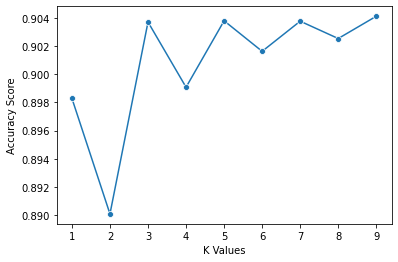

In [95]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")


In [96]:
scores

[0.8982867184067945,
 0.8900863962512812,
 0.9037047884024016,
 0.8990774637575047,
 0.9037926489969248,
 0.901625420998682,
 0.9037633621320837,
 0.9025333138087568,
 0.9041148045101771]

In [97]:
np.mean(scores)

0.9007761019182896